In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import rasterio
import os 
import glob
from tqdm import tqdm

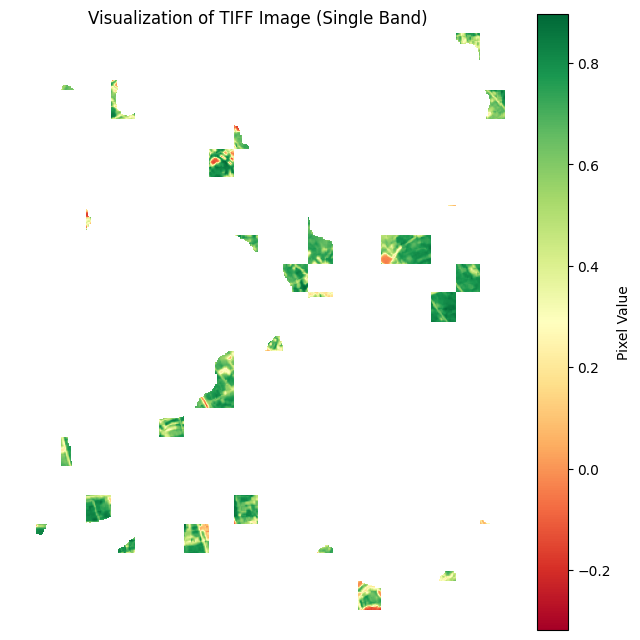

In [3]:
import rasterio
import matplotlib.pyplot as plt

# Đường dẫn tới tệp TIFF
tiff_file = "/mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-01.tif"

# Đọc tệp TIFF
with rasterio.open(tiff_file) as src:
    data = src.read(1)  # Đọc băng đầu tiên (band 1)

# Hiển thị ảnh
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap="RdYlGn")  # Sử dụng cmap 'gray' cho ảnh đơn kênh
plt.colorbar(label="Pixel Value")  # Thanh màu cho giá trị pixel
plt.title("Visualization of TIFF Image (Single Band)")
plt.axis("off")
plt.show()


In [7]:
list_path = [os.path.join('/mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth', path) for path in os.listdir('/mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth')]

In [130]:
from datetime import datetime

In [131]:
list_path = sorted(list_path, key=lambda x: datetime.strptime(x.split('__')[-1].split('.')[0], '%Y-%m-%d'))


In [132]:
def transform_tif_to_npy(list_path):
    GT_image = []
    for path in tqdm(list_path, desc="Transform tiff to npy: "):
        with rasterio.open(path) as src:
            data = src.read(1)
            GT_image.append(np.array(data))

    return GT_image

In [133]:
GT_image = transform_tif_to_npy(list_path)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 371.30it/s]


In [14]:
inference_path = [os.path.join('/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result', path) for path in os.listdir('/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result')]

In [15]:
inference_path

['/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2023-03-02.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-26.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-04.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-12.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-20.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/r

In [35]:
def extract_date(path):
    return path.split('/')[-1].split('__')[-1].split('.')[0]

In [37]:
list_days = [extract_date(path) for path in list_path] 

In [38]:
list_days

['2023-05-29',
 '2022-10-01',
 '2022-10-09',
 '2022-10-17',
 '2022-10-25',
 '2022-11-02',
 '2022-11-10',
 '2022-11-18',
 '2022-11-26',
 '2022-12-12',
 '2022-12-20',
 '2022-12-28',
 '2023-01-13',
 '2023-01-21',
 '2023-01-29',
 '2023-02-22',
 '2023-03-02',
 '2023-03-10',
 '2023-05-05',
 '2023-05-13',
 '2023-05-21',
 '2023-06-06',
 '2023-06-14',
 '2023-06-22',
 '2023-06-30',
 '2023-07-08',
 '2023-07-16',
 '2023-07-24',
 '2023-08-01',
 '2023-08-17',
 '2023-08-25',
 '2023-09-02',
 '2023-09-10',
 '2023-09-18',
 '2023-09-26']

In [124]:
from datetime import datetime
list_days = sorted(list_days, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [125]:
inference_path_same = []
for date in list_days:
    path = f'/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_{date}.tif'
    inference_path_same.append(path)

In [126]:
inference_path_same

['/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-26.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-12.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-20.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-12-28.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2023-01-13.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/r

In [127]:
inference_image = transform_tif_to_npy(inference_path_same)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 428.86it/s]


In [128]:
inference_image[0]

array([[0.8632163 , 0.85988396, 0.6041237 , ..., 0.7857311 , 0.81868386,
        0.8230133 ],
       [0.78907   , 0.7817109 , 0.27256152, ..., 0.76405966, 0.7740169 ,
        0.8176871 ],
       [0.5979579 , 0.75306123, 0.33164984, ..., 0.75747687, 0.7403035 ,
        0.72842103],
       ...,
       [0.5445154 , 0.53095466, 0.53813624, ..., 0.25304878, 0.31912225,
        0.3222286 ],
       [0.535591  , 0.5138525 , 0.5024005 , ..., 0.32406893, 0.32490975,
        0.32207084],
       [0.53138244, 0.5186814 , 0.5061192 , ..., 0.33050397, 0.3431927 ,
        0.3597534 ]], dtype=float32)

In [134]:
GT_image[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [135]:
for i in range(len(inference_image)):
    print('inference ', inference_path_same[i])
    print('gt ', list_path[i])

inference  /mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-01.tif
gt  /mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-01.tif
inference  /mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-09.tif
gt  /mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-09.tif
inference  /mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-17.tif
gt  /mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-17.tif
inference  /mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-25.tif
gt  /mnt/storage/huyekgis/brios/test_data/AnNinh_Ground_Truth-20241206T011119Z-001/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-25.tif
inference  /mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-11-02.tif
gt  /mnt/storage/huyekgis/

In [216]:
import rasterio
from rasterio.enums import Resampling

In [217]:
def resample_raster(source_path, target_path, output_path):
    # Mở ảnh nguồn
    with rasterio.open(source_path) as src:
        # Mở ảnh mục tiêu để lấy thông tin kích thước
        with rasterio.open(target_path) as target:
            target_width = target.width
            target_height = target.height
            target_transform = target.transform
            target_crs = target.crs

        # Định nghĩa profile cho ảnh resample
        profile = src.profile
        profile.update({
            'width': target_width,
            'height': target_height,
            'transform': target_transform,
            'crs': target_crs
        })

        # Resample và lưu ảnh
        with rasterio.open(output_path, 'w', **profile) as dst:
            for i in range(1, src.count + 1):  # Duyệt qua từng band
                data = src.read(
                    i,
                    out_shape=(target_height, target_width),
                    resampling=Resampling.bilinear  # Nội suy bilinear
                )
                dst.write(data, i)

In [219]:
output_path = '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample'
for i in tqdm(range(len(list_path))):
    output_path_file = f'{output_path}/anninh_infer_{list_days[i]}.tif'
    resample_raster(inference_path_same[i], list_path[i], output_path_file)

100%|██████████| 35/35 [00:00<00:00, 116.28it/s]


In [59]:
def calculate_rmse(array1, array2):
    # Xác định mask của các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc giá trị từ cả hai mảng theo mask
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính RMSE
    rmse = np.sqrt(np.mean((valid_array1 - valid_array2) ** 2))
    return rmse

In [74]:
f = '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-10-01.tif'
with rasterio.open(f) as src:
    d = src.read(1)
    a = src.meta
d.shape

(466, 398)

In [69]:
a

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 398,
 'height': 466,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 106.39152151705346,
        0.0, -8.983152841195215e-05, 20.683889079908806)}

In [220]:
list_img_resample_infer = [f'{output_path}/anninh_infer_{day}.tif' for day in list_days]

In [221]:
list_img_resample_infer

['/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-11-26.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-12-12.tif',
 '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result_resample/anninh_infer_2022-12-20.tif',
 '/mnt/storage/huyekgis/brios/

In [222]:
inference_image = transform_tif_to_npy(list_img_resample_infer)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 897.75it/s]


In [223]:
for i in range(len(GT_image)):
    print(f'size at {i} GT: {GT_image[i].shape}')
    print(f'size at {i} infer: {inference_image[i].shape}')

size at 0 GT: (466, 398)
size at 0 infer: (466, 398)
size at 1 GT: (466, 398)
size at 1 infer: (466, 398)
size at 2 GT: (466, 398)
size at 2 infer: (466, 398)
size at 3 GT: (466, 398)
size at 3 infer: (466, 398)
size at 4 GT: (466, 398)
size at 4 infer: (466, 398)
size at 5 GT: (466, 398)
size at 5 infer: (466, 398)
size at 6 GT: (466, 398)
size at 6 infer: (466, 398)
size at 7 GT: (466, 398)
size at 7 infer: (466, 398)
size at 8 GT: (466, 398)
size at 8 infer: (466, 398)
size at 9 GT: (466, 398)
size at 9 infer: (466, 398)
size at 10 GT: (466, 398)
size at 10 infer: (466, 398)
size at 11 GT: (466, 398)
size at 11 infer: (466, 398)
size at 12 GT: (466, 398)
size at 12 infer: (466, 398)
size at 13 GT: (466, 398)
size at 13 infer: (466, 398)
size at 14 GT: (466, 398)
size at 14 infer: (466, 398)
size at 15 GT: (466, 398)
size at 15 infer: (466, 398)
size at 16 GT: (466, 398)
size at 16 infer: (466, 398)
size at 17 GT: (466, 398)
size at 17 infer: (466, 398)
size at 18 GT: (466, 398)
size

In [90]:
rmse_final = []
for i in range(len(GT_image)):
    rmse_final.append(calculate_rmse(GT_image[i], inference_image[i]))

In [97]:
def calculate_mse(array1, array2):
    # Tạo mask cho các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc các giá trị hợp lệ từ cả hai mảng
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính MSE
    mse = np.mean((valid_array1 - valid_array2) ** 2)
    return mse

In [101]:
def calculate_std_difference(array1, array2):
    # Tạo mask cho các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc các giá trị hợp lệ từ cả hai mảng
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính sự khác biệt giữa hai mảng
    difference = valid_array1 - valid_array2
    
    # Tính độ lệch chuẩn của sự khác biệt
    std_difference = np.std(difference)
    return std_difference

In [98]:
mse_final = []
for i in range(len(GT_image)):
    mse_final.append(calculate_mse(GT_image[i], inference_image[i]))

In [102]:
std_final = []
for i in range(len(GT_image)):
    std_final.append(calculate_std_difference(GT_image[i], inference_image[i]))

In [103]:
std_final

[np.float32(0.11119828),
 np.float32(0.151893),
 np.float32(0.13358177),
 np.float32(0.16073395),
 np.float32(0.113607295),
 np.float32(0.0868397),
 np.float32(0.08291149),
 np.float32(0.09822145),
 np.float32(0.09532981),
 np.float32(0.12400762),
 np.float32(0.099186175),
 np.float32(0.117822826),
 np.float32(0.1051735),
 np.float32(0.12722586),
 np.float32(0.12719864),
 np.float32(0.11123108),
 np.float32(0.09863069),
 np.float32(0.13178352),
 np.float32(0.10345081),
 np.float32(0.1384534),
 np.float32(0.12790482),
 np.float32(0.13442585),
 np.float32(0.0776099),
 np.float32(0.16496274),
 np.float32(0.16123006),
 np.float32(0.14030129),
 np.float32(0.15852922),
 np.float32(0.12266396),
 np.float32(0.11606663),
 np.float32(0.18116663),
 np.float32(0.1269085),
 np.float32(0.09993549),
 np.float32(0.08988049),
 np.float32(0.10436811),
 np.float32(0.13461532)]

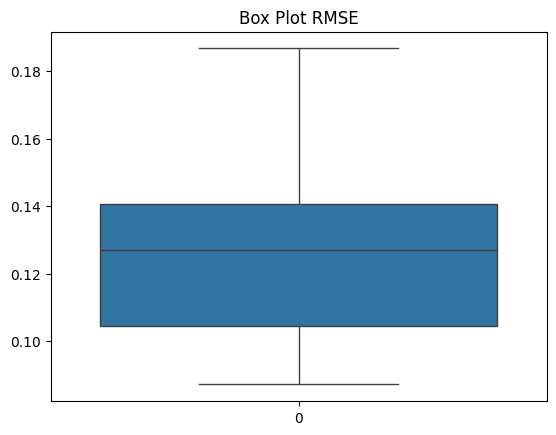

In [105]:
import seaborn as sns
import pandas as pd 

df = pd.DataFrame(rmse_final)

sns.boxplot(data=df)
plt.title("Box Plot RMSE")
plt.show()

In [298]:
np.median(rmse_final)

np.float32(0.12706505)

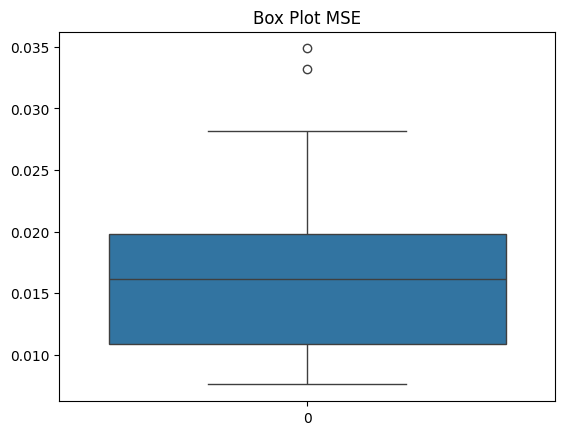

In [106]:
df = pd.DataFrame(mse_final)

sns.boxplot(data=df)
plt.title("Box Plot MSE")
plt.show()

In [300]:
np.mean(mse_final)

np.float32(0.016804675)

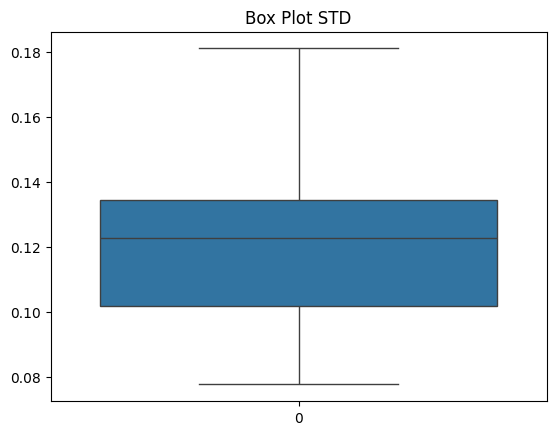

In [104]:
df = pd.DataFrame(std_final)

sns.boxplot(data=df)
plt.title("Box Plot STD")
plt.show()

In [302]:
np.median(std_final)

np.float32(0.12266396)

In [136]:
GT_image = np.array(GT_image)
inference_image = np.array(inference_image)

In [137]:
GT_image[:, 1,1]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.69208425,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan],
      dtype=float32)

In [138]:
inference_image[:,200,200]

array([0.7817109 , 0.7626785 , 0.79037976, 0.72462314, 0.5908046 ,
       0.63796973, 0.68791676, 0.68791676, 0.8038217 , 0.74125487,
       0.71970934, 0.78350234, 0.7644614 , 0.7681426 , 0.7999078 ,
       0.7395518 , 0.6727087 , 0.51290673, 0.3641941 , 0.3641941 ,
       0.56308985, 0.56308985, 0.3559996 , 0.3811856 , 0.15406163,
       0.15406163, 0.23712379, 0.25578836, 0.25207418, 0.3508516 ,
       0.36378956, 0.4349803 , 0.49758455, 0.50246304, 0.5779671 ],
      dtype=float32)

In [209]:
array1 = GT_image[:,300,260]
array2 = inference_image[:,300,260]

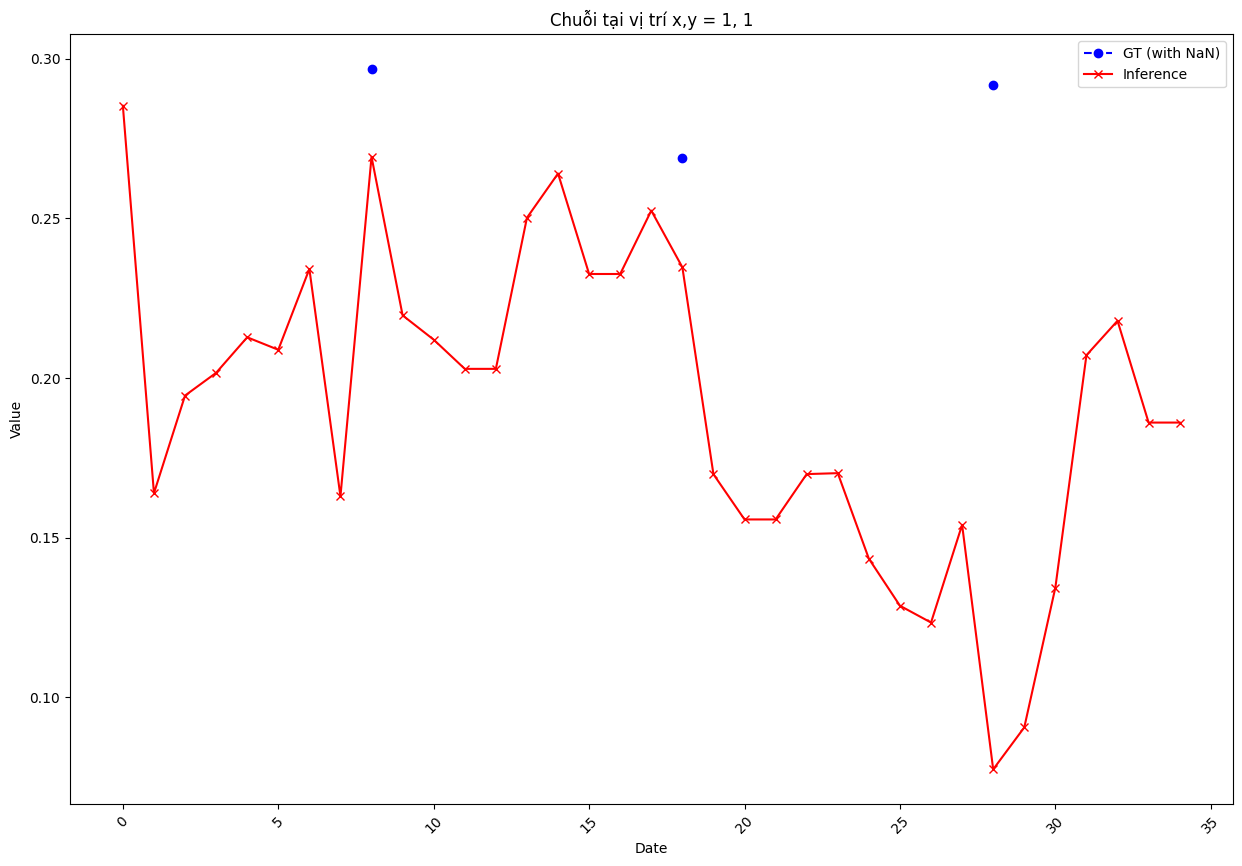

In [210]:
# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
# Plot chuỗi đầu tiên (array1)
plt.plot(array1, label='GT (with NaN)', marker='o', color='blue', linestyle='--')

# Plot chuỗi thứ hai (array2)
plt.plot(array2, label='Inference', marker='x', color='red')

# Thêm thông tin vào biểu đồ
plt.title('Chuỗi tại vị trí x,y = 1, 1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn ngày tháng cho dễ đọc
plt.show()

Create difference image

In [268]:
def make_diff_img(img1, img2):
    difference = np.where(
        np.isnan(img1) | np.isnan(img2),  # Điều kiện: Nếu phần tử nào là NaN
        np.nan,                              # Gán NaN vào ma trận kết quả
        abs(img2-img1)                    # Nếu không, thực hiện phép trừ
    )
    return difference

In [260]:
def make_diff_img1(img1, img2):
    # Kiểm tra điều kiện NaN trên cả hai ảnh
    valid_mask = ~np.isnan(img1) & ~np.isnan(img2)
    
    # Gán NaN vào những phần tử mà có NaN trong cả hai ảnh, còn lại lấy giá trị từ img2
    difference = np.where(valid_mask, img2, np.nan)
    
    return difference

In [269]:
list_diff_image = []
for i in range(len(GT_image)):
    list_diff_image.append(make_diff_img(GT_image[i], inference_image[i]))

In [270]:
list_diff_image[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [282]:
mean_std = []
for i in range(len(list_diff_image)):
    mean_std.append(np.nanmean(list_diff_image[i]))
    

In [283]:
for i in range(len(mean_std)):
    print(f'stt {i+1}: {mean_std[i]}')

stt 1: 0.16154561936855316
stt 2: 0.10417129099369049
stt 3: 0.11563878506422043
stt 4: 0.08204663544893265
stt 5: 0.08015674352645874
stt 6: 0.0630398839712143
stt 7: 0.07276174426078796
stt 8: 0.07504996657371521
stt 9: 0.09352171421051025
stt 10: 0.07014037668704987
stt 11: 0.0896851196885109
stt 12: 0.1329011619091034
stt 13: 0.09734156727790833
stt 14: 0.09779732674360275
stt 15: 0.08456283807754517
stt 16: 0.07252344489097595
stt 17: 0.1064838171005249
stt 18: 0.07512584328651428
stt 19: 0.11092643439769745
stt 20: 0.09425020217895508
stt 21: 0.0851917713880539
stt 22: 0.11475137621164322
stt 23: 0.07755152881145477
stt 24: 0.12994182109832764
stt 25: 0.12684930860996246
stt 26: 0.10206220299005508
stt 27: 0.12272103875875473
stt 28: 0.09478367120027542
stt 29: 0.0875805988907814
stt 30: 0.1415172964334488
stt 31: 0.08624330908060074
stt 32: 0.07891038805246353
stt 33: 0.06313174962997437
stt 34: 0.07018377631902695
stt 35: 0.10783812403678894


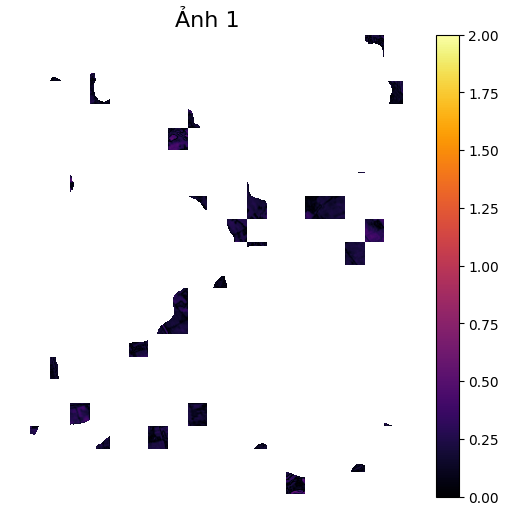

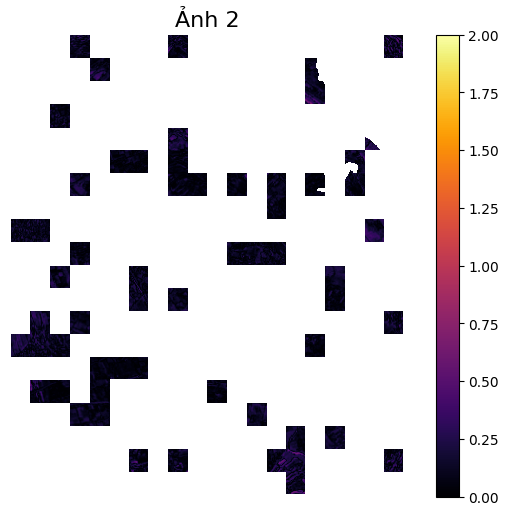

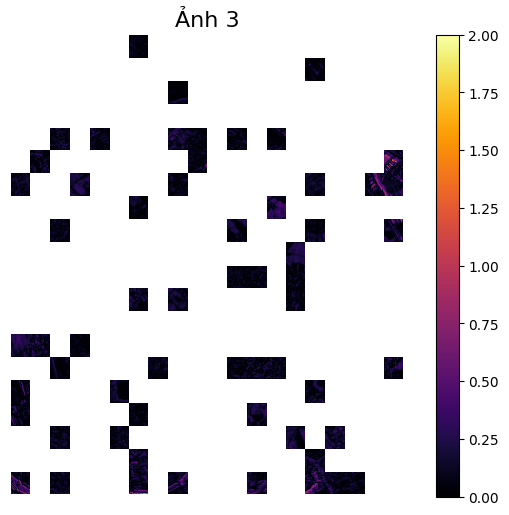

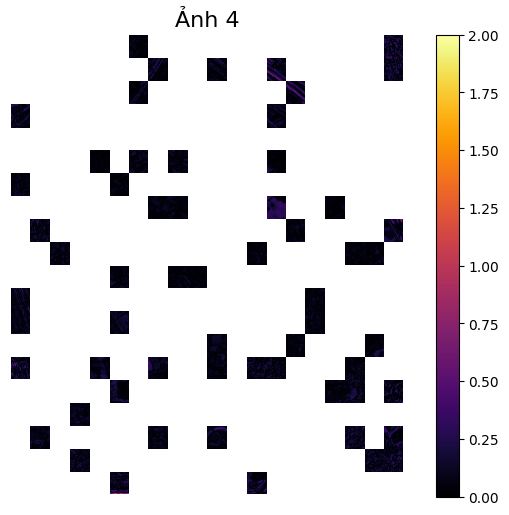

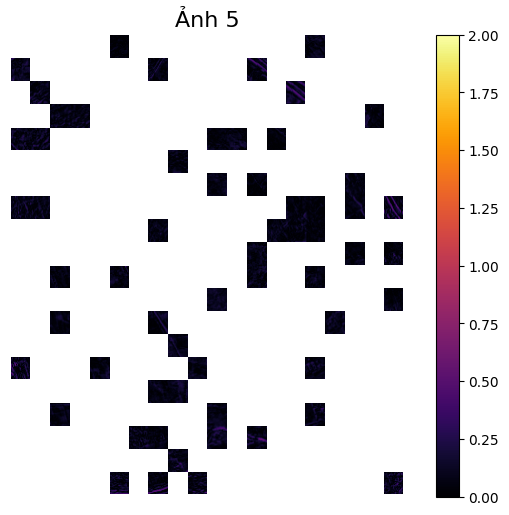

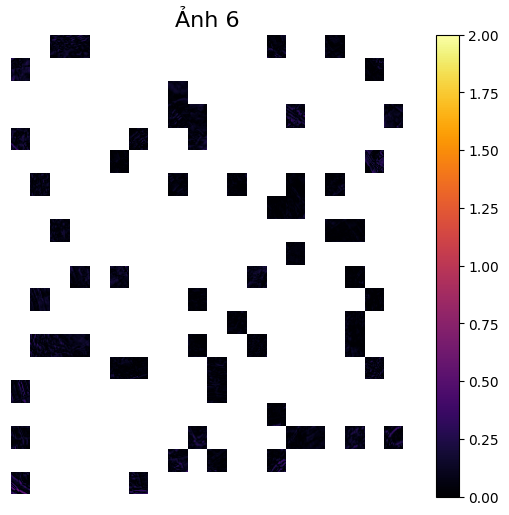

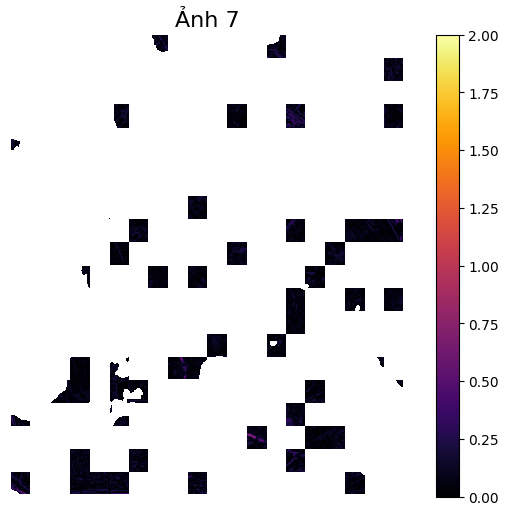

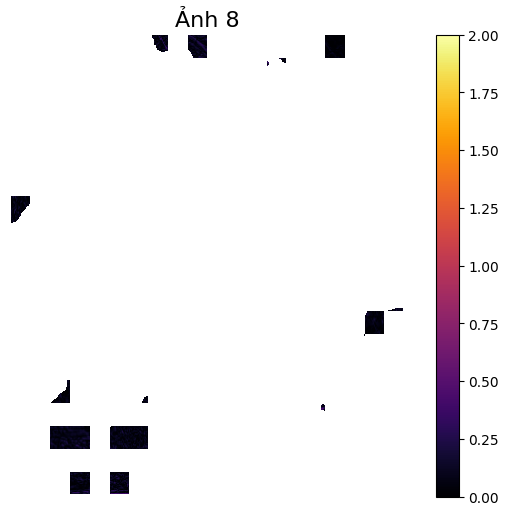

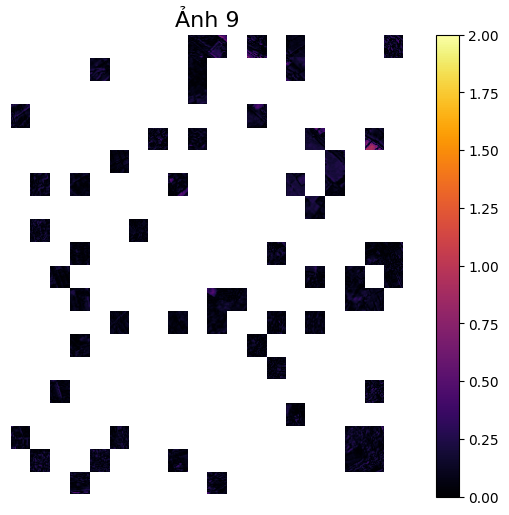

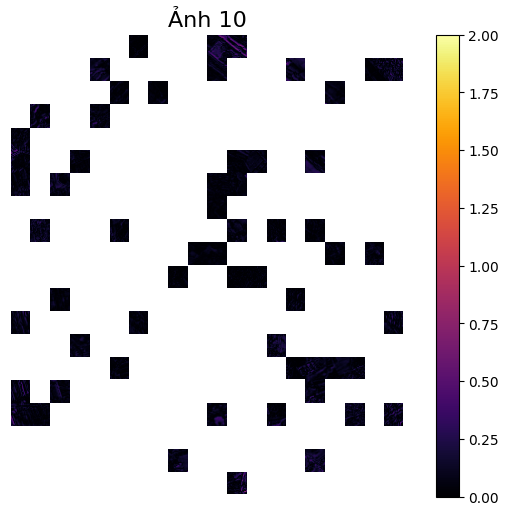

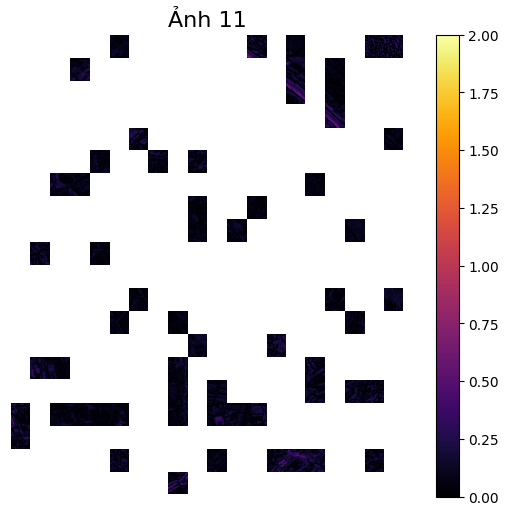

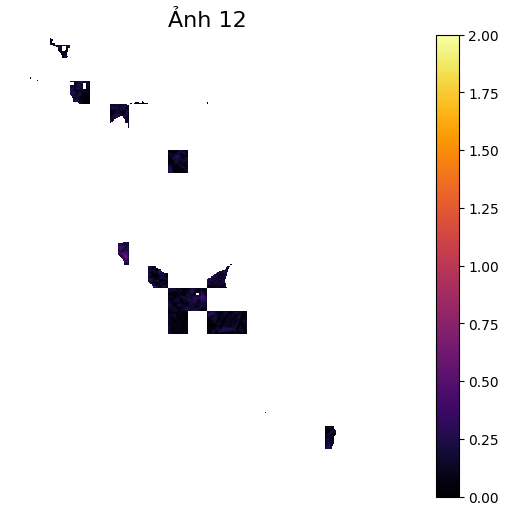

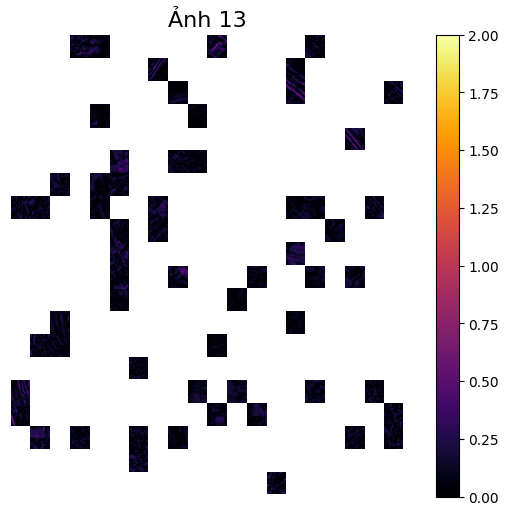

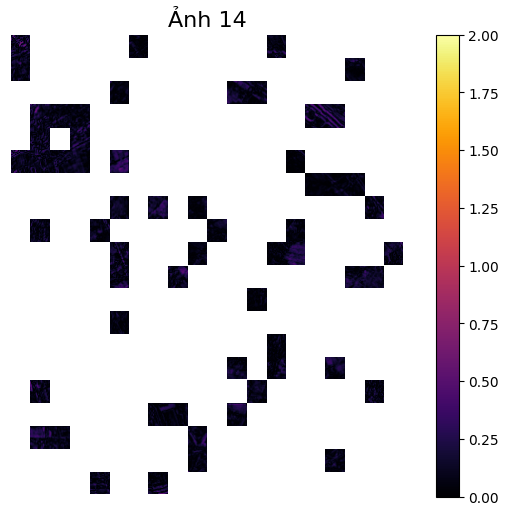

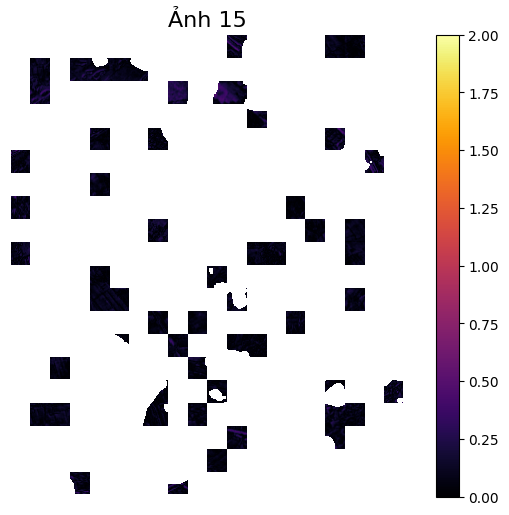

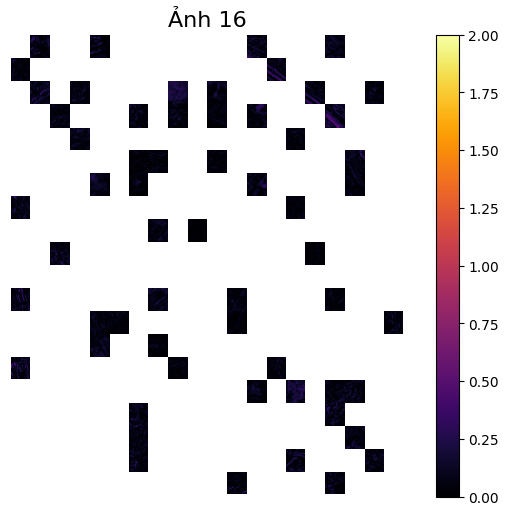

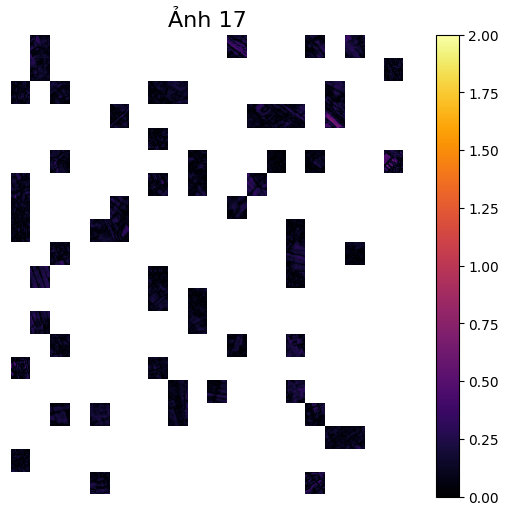

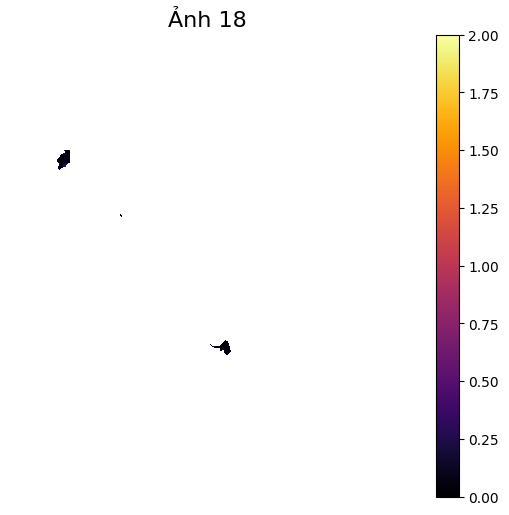

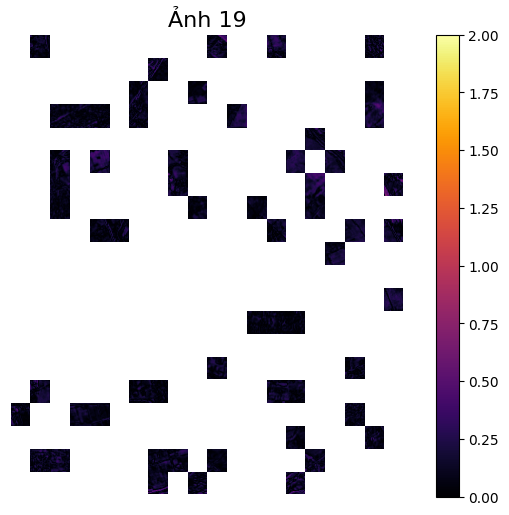

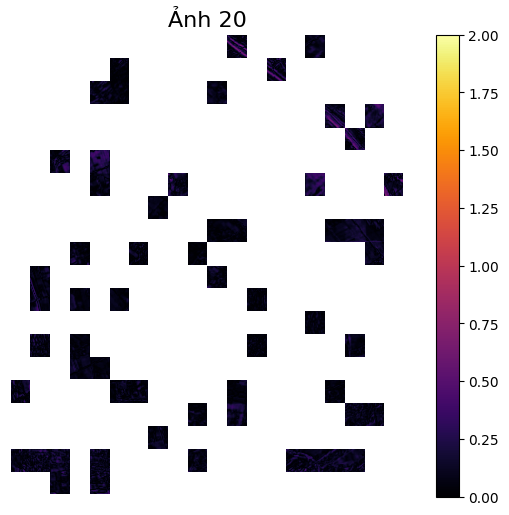

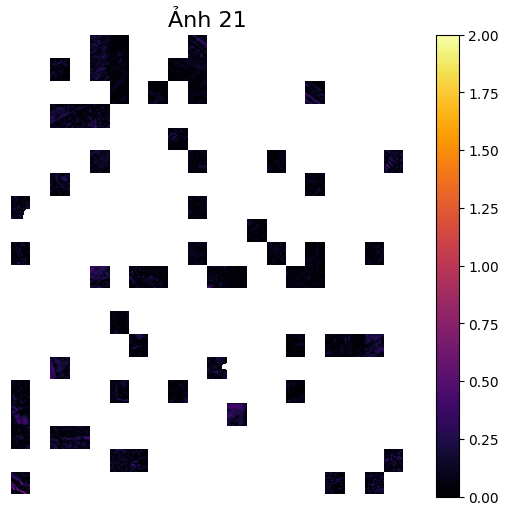

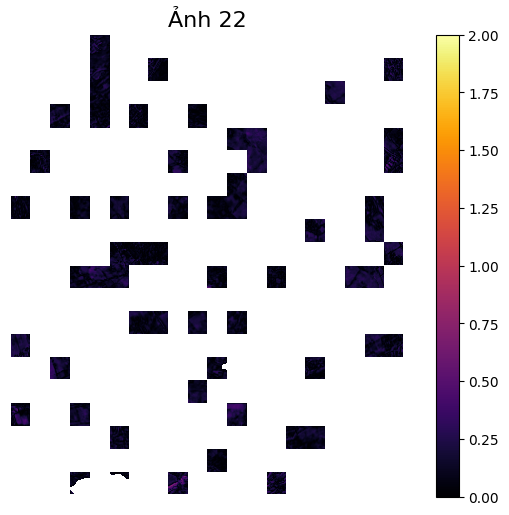

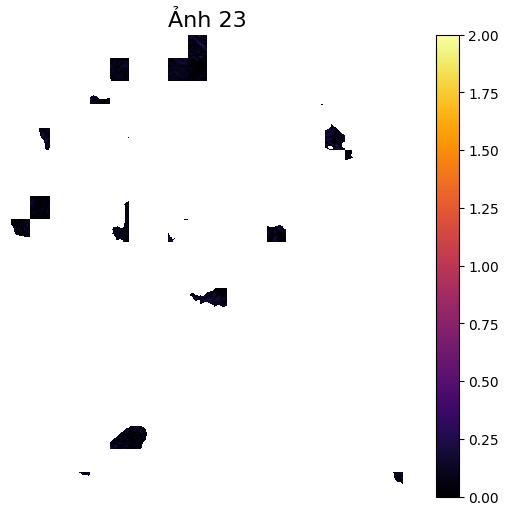

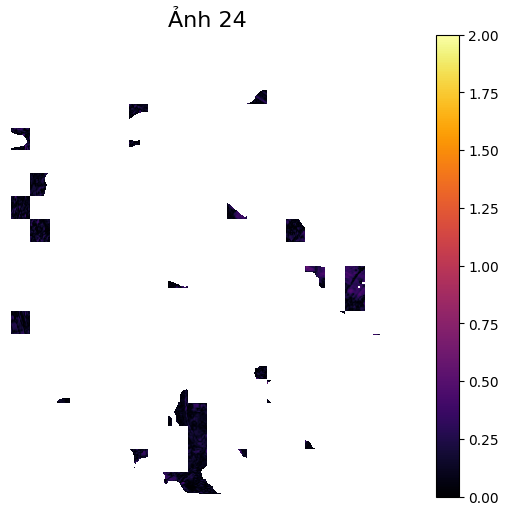

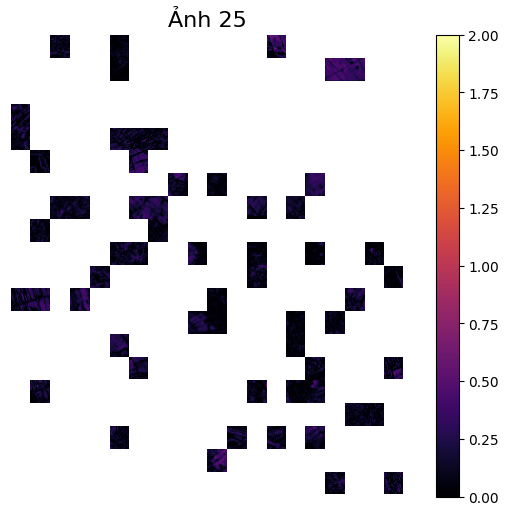

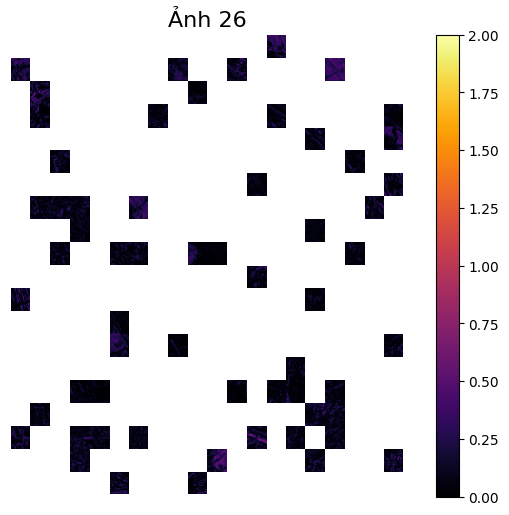

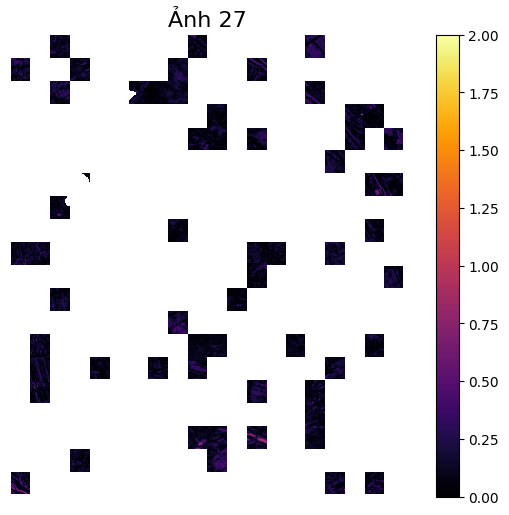

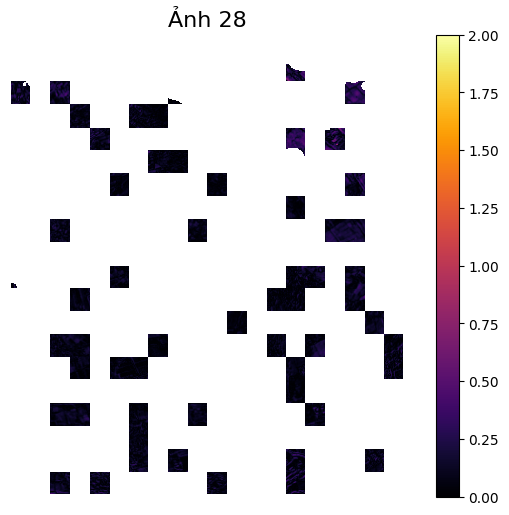

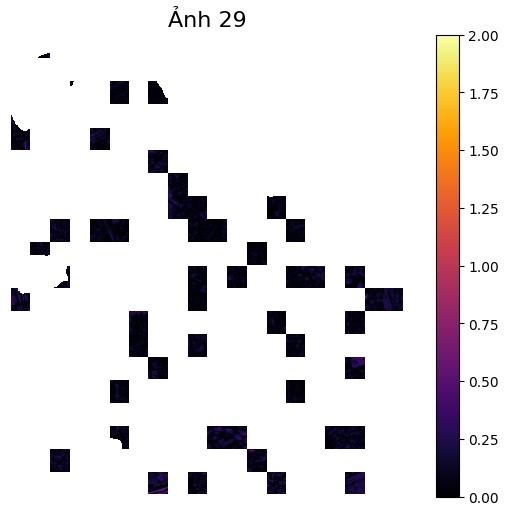

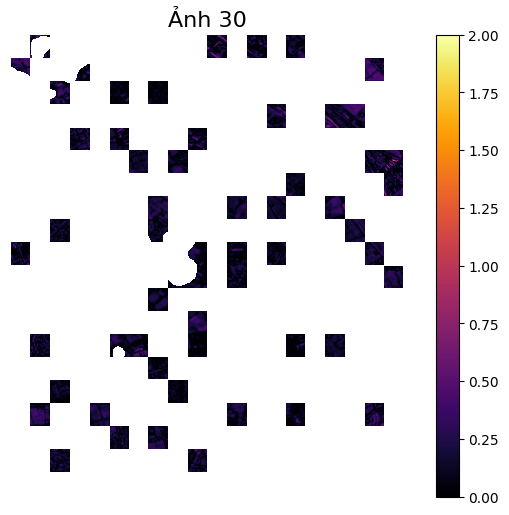

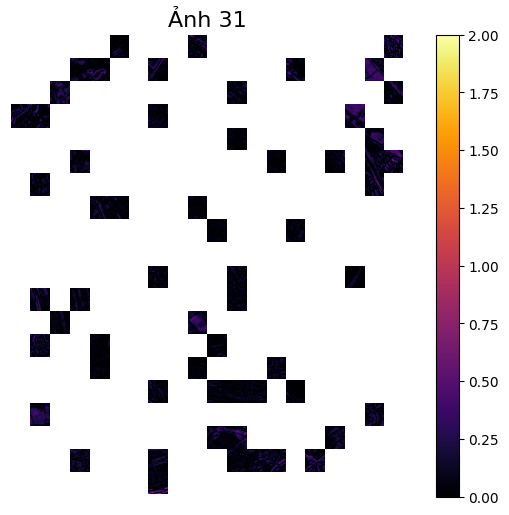

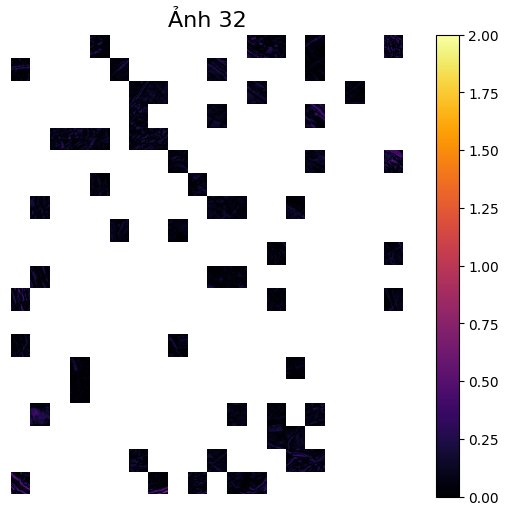

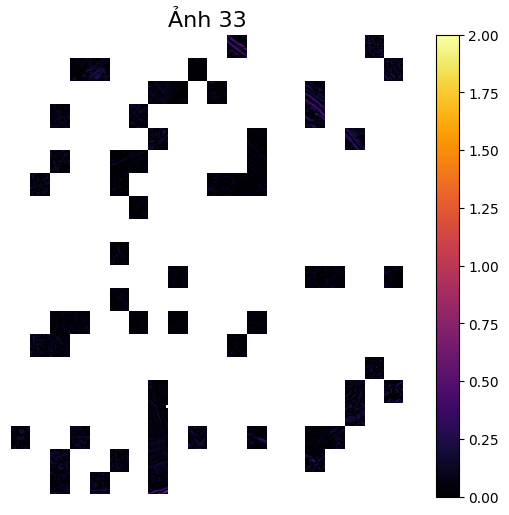

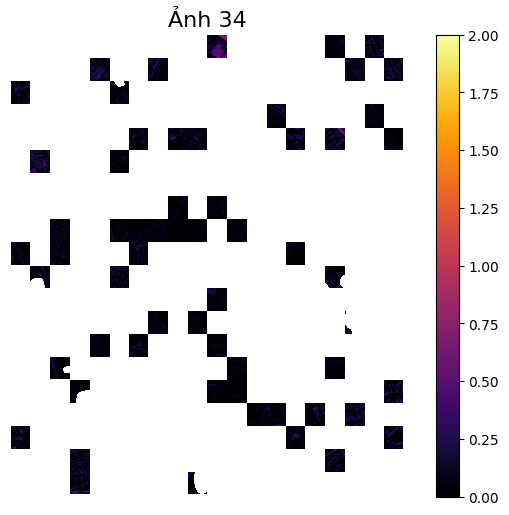

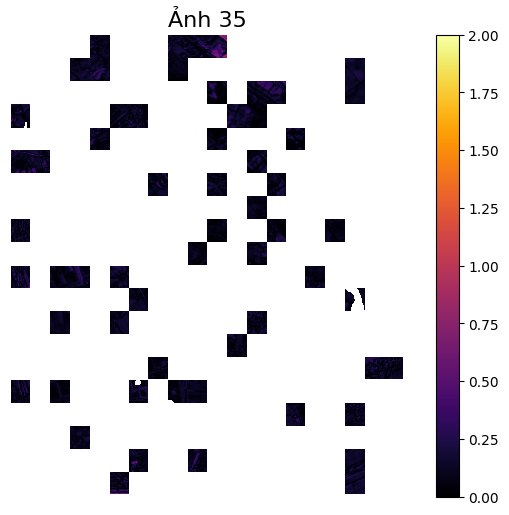

In [285]:
num_images = len(list_diff_image)

# Hiển thị từng ảnh một
for idx, img in enumerate(list_diff_image):
    plt.figure(figsize=(8, 6))
    im = plt.imshow(img, cmap='inferno', vmin = 0, vmax=2) 
    plt.colorbar(im, orientation='vertical')  
    plt.title(f'Ảnh {idx + 1}', fontsize=16)
    plt.axis('off') 
    plt.show() 

# visual

/mnt/storage/huyekgis/brios/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


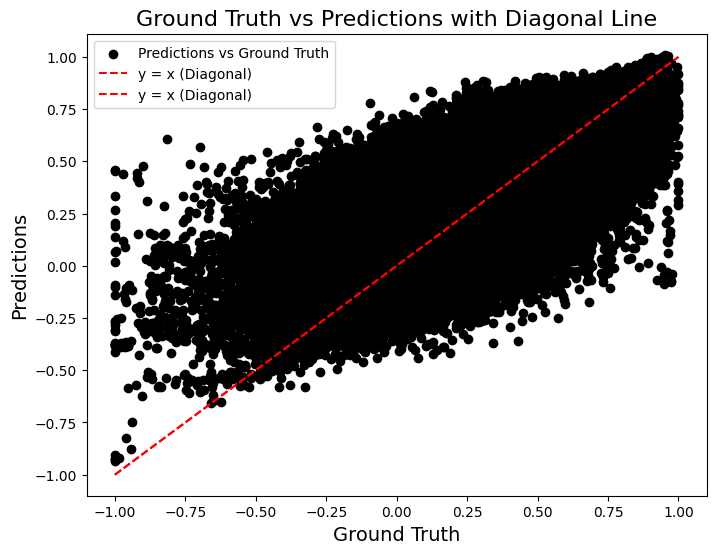

In [297]:
GT_flat = np.array(GT_image).flatten()
inference_flat = np.array(inference_image).flatten()



# Vẽ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x = GT_flat,y = inference_flat, color='black', label='Predictions vs Ground Truth')

# Vẽ đường chéo y = x
min_value = (-1,-1)
max_value = (1,1)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='y = x (Diagonal)')

# Thêm tiêu đề và nhãn
plt.title('Ground Truth vs Predictions with Diagonal Line', fontsize=16)
plt.xlabel('Ground Truth', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.legend()

# Hiển thị biểu đồ
plt.show()